<a href="https://colab.research.google.com/github/YGuo00/MA-573-Independent-Study/blob/main/src/day4_hw2_redo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.stats as ss

In [2]:
'''=========
option class init
=========='''
class VanillaOption:
    def __init__(
        self,
        otype = 1, # 1: 'call'
                  # -1: 'put'
        strike = 110.,
        maturity = 1.,
        market_price = 10.):
      self.otype = otype
      self.strike = strike
      self.maturity = maturity
      self.market_price = market_price #this will be used for calibration
      
        
    def payoff(self, s): #s: excercise price
      otype = self.otype
      k = self.strike
      maturity = self.maturity
      return max([0, (s - k)*otype])

In [3]:
'''============
Gbm class
============='''

class Gbm:
    def __init__(self,
                 init_state = 100.,
                 drift_ratio = .0475,
                 vol_ratio = .2
                ):
        self.init_state = init_state
        self.drift_ratio = drift_ratio
        self.vol_ratio = vol_ratio

In [4]:
'''========
Black-Scholes-Merton formula. 
=========='''

def bsm_price(self, vanilla_option):
    s0 = self.init_state
    sigma = self.vol_ratio
    r = self.drift_ratio
    
    otype = vanilla_option.otype
    k = vanilla_option.strike
    maturity = vanilla_option.maturity
    
    d1 = (np.log(s0 / k) + (r + 0.5 * sigma ** 2) 
          * maturity) / (sigma * np.sqrt(maturity))
    d2 = d1 - sigma * np.sqrt(maturity)
    
    return (otype * s0 * ss.norm.cdf(otype * d1) #line break needs parenthesis
            - otype * np.exp(-r * maturity) * k * ss.norm.cdf(otype * d2))

Gbm.bsm_price = bsm_price

In [5]:
gbm = Gbm(init_state = 100, drift_ratio = 0.0475, vol_ratio = 0.2)

In [6]:
T_list = np.arange(0.5, 2, 0.1) 
bsm_price_list = []
for T in T_list:
   option = VanillaOption(otype = 1, strike = 110, maturity = T)
   bsm_price_list.append(gbm.bsm_price(option))

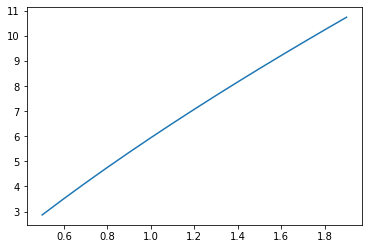

In [7]:
import matplotlib.pyplot as plt
plt.plot(T_list, bsm_price_list)

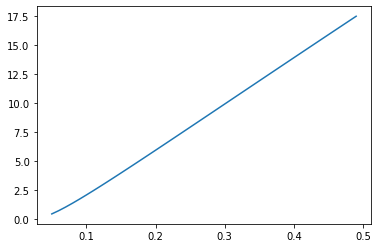

In [22]:
sigma_list = np.arange(0.05, 0.5, 0.01)
bsm_price_list = []
for sigma in sigma_list:
    gbm = Gbm(init_state = 100, drift_ratio = 0.0475, vol_ratio = sigma)
    option = VanillaOption(otype = 1, strike = 110, maturity = 1)
    bsm_price_list.append(gbm.bsm_price(option))

plt.plot(sigma_list, bsm_price_list)